<h1>How can we control the increasing number of accidents in New York?</h1>

In [1]:
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Suppress all warnings
sns.set_style('darkgrid')

<h2>Fetching the relevant data</h2>

<p>I have been requested for the analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>


<p>Using the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary and stored them as dataset.</p>

In [5]:
with open(r'./data/borough_data.json') as file:
    data = json.load(file)
dataset = pd.DataFrame(columns=['Area', 'Name', 'Population'])
keys = []
for i in data.keys():
    keys.append(i)
    for i in range(0, len(keys)):
        dataset.loc[i] = [data[keys[i]]['area'],data[keys[i]]['name'], data[keys[i]]['population']]
dataset.index = keys

In [6]:
#check dataset
dataset

,Area,Name,Population
the bronx,42.10,the bronx,1471160.0
brooklyn,70.82,brooklyn,2648771.0
manhattan,22.83,manhattan,1664727.0
queens,108.53,queens,2358582.0
staten island,58.37,staten island,479458.0



<p>Similarly, I used the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. I named this DataFrame <code>df</code>. </p>

In [9]:
df = pd.read_csv(r'./data/accidents.csv', delimiter= ';')

-------

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [10]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<p>From the analysis od data provided, the following can be benefited and initiated.</p>

<li>[x] Road safety audits at high risk locations</li>
<li>[x] Targeted education and awareness initiatives</li>

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>


<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>


Text(0, 0.5, 'Frequency of Accidents')

<Figure size 432x288 with 0 Axes>

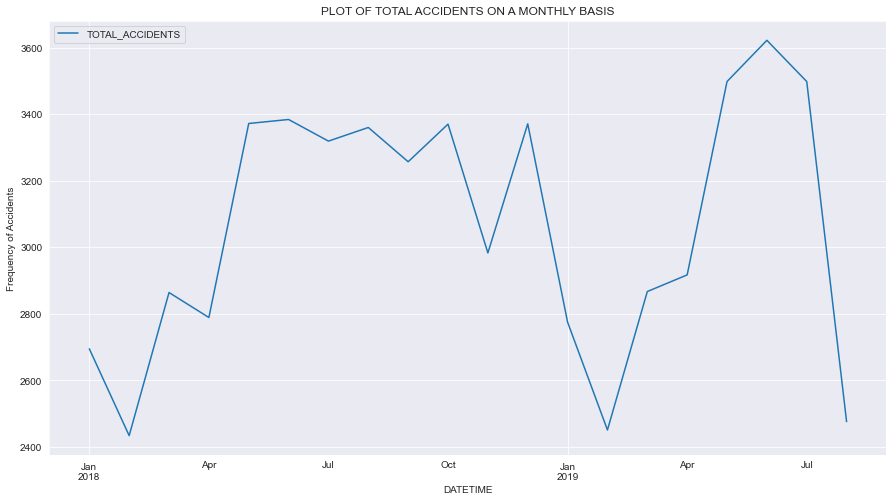

In [11]:
df['DATETIME'] = df['DATE'] + ' ' + df['TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format= '%m/%d/%Y %H:%M')
df['TOTAL_INJURED'] =df['NUMBER OF CYCLIST INJURED']+df['NUMBER OF MOTORIST INJURED'] + df['NUMBER OF PEDESTRIANS INJURED']
df['TOTAL_DEATH'] = df['NUMBER OF CYCLIST KILLED']+df['NUMBER OF MOTORIST KILLED'] + df['NUMBER OF PEDESTRIANS KILLED']
df['MonthOftheyear'] = df['DATETIME'].dt.month_name()
df['DayOftheWeek'] = df['DATETIME'].dt.day_name()
new_df = df[[ 'TOTAL_DEATH', 'TOTAL_INJURED', 'DATETIME' ]]
new_df['TOTAL_ACCIDENTS'] = new_df['TOTAL_DEATH'] + new_df['TOTAL_INJURED']
new_df.reset_index(inplace = True)
new_df = new_df[[ 'TOTAL_ACCIDENTS', 'DATETIME' ]].set_index('DATETIME').resample('M').agg({'TOTAL_ACCIDENTS':'sum'})
plt.figure()
ax = new_df.plot(figsize= (15,8))
ax.set_title('PLOT OF TOTAL ACCIDENTS ON A MONTHLY BASIS')
datemin = pd.to_datetime('2017-12-31')
datemax = pd.to_datetime('2019-09-30')
ax.set_xlim(datemin, datemax)
ax.set_ylabel('Frequency of Accidents')

**Answer.**
The occurrence of accidents is seen as a periodical as it increases almost the same proportion as the former year. Also the maximum and minimum almost lies in the same month

-------


<p>From the plot above, which months seem to have the least and most number of accidents? What do you think are the reasons behind this?</p>

In [12]:
# the month with the least number of accidents
print(new_df[new_df['TOTAL_ACCIDENTS']==new_df['TOTAL_ACCIDENTS'].min()])

            TOTAL_ACCIDENTS
DATETIME                   
2018-02-28             2434


In [13]:
# the month with the modt number of accidents
print(new_df[new_df['TOTAL_ACCIDENTS']==new_df['TOTAL_ACCIDENTS'].max()])

            TOTAL_ACCIDENTS
DATETIME                   
2019-06-30             3622


**Illustrations.**
February 2018 has the lowest number of accidents, 
The Reason: 
<p>Checking throught the weather analysis <a href="https://www.weathergamut.com/2018/03/01/february-2018-warmest-on-record-in-nyc/" >Weathergamut</a> </p>
<p>It was shown, the month is the Overall, it had nineteen out of twenty-eight days that were warmer than normal. Also, February is usually the city’s snowiest month on the calendar, 2018. </p>

<p>Also, it was read on a blog that the Pedestrian Congestion was the second lowest in year 2018.</p>

<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>

Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

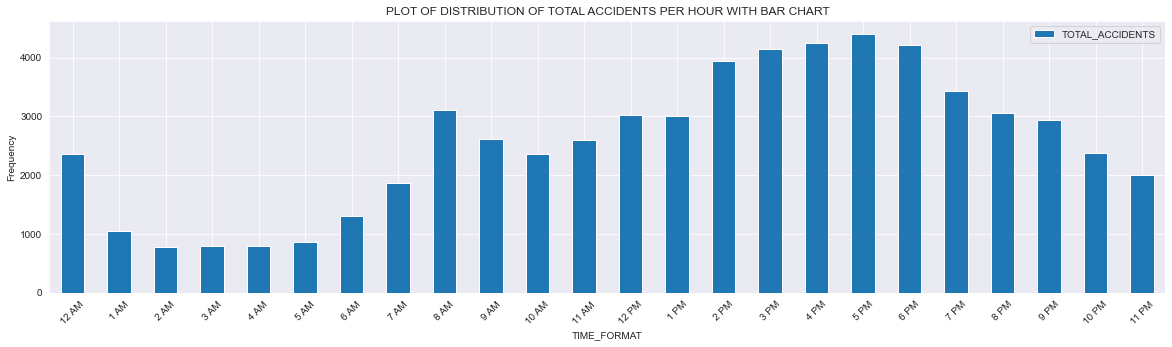

In [14]:
df['HOUR'] = df['DATETIME'].dt.hour
df['TOTAL'] = df['TOTAL_DEATH'] + df['TOTAL_INJURED']
new_df = df[['TOTAL', 'HOUR']].sort_values(by = 'HOUR', ascending = True)
new_df = new_df[['TOTAL','HOUR']].groupby('HOUR').sum().reset_index()
new_df = new_df.sort_values('HOUR')
def time_format(time):
    if time > 12:
        t = time - 12
        return str(t) + ' PM'
    elif time  == 0:
        t = time +12
        return str(t) + ' AM'
    elif time == 12:
        return  str(time) + ' PM'
    else:
        return str(time)+ ' AM'
new_df['TIME_FORMAT'] = new_df['HOUR'].apply(lambda x: time_format(x))
new_df.rename({'TOTAL':'TOTAL_ACCIDENTS'}, axis = 1, inplace=True)
plt.figure()
ax = new_df[['TOTAL_ACCIDENTS', 'TIME_FORMAT']].set_index('TIME_FORMAT').plot.bar(figsize = (20,5),rot = 45)
ax.set_title('PLOT OF DISTRIBUTION OF TOTAL ACCIDENTS PER HOUR WITH BAR CHART')
ax.set_ylabel('Frequency')

**Illustration:**
<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>


<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>
<p>The approach is flimsy because checking the date and place of occurence of accidents provides a lot of information about the accidents but according to reports most accidents occur between the day 1pm and evening 7pm, according to self investigation.</p>


<p>How does the number of accidents vary throughout a single week? Visualize the plot with a bar graph based on the accidents count by day of the week.</p>


Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

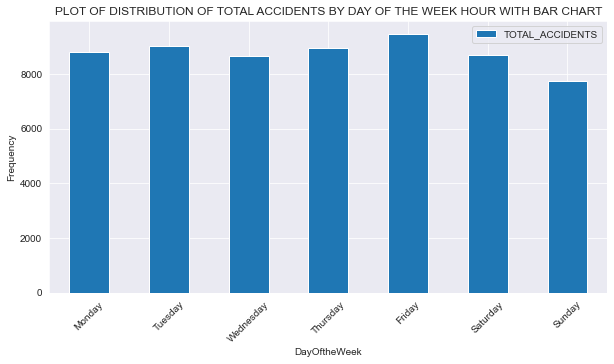

In [15]:
df['WEEKDAY'] = df['DATETIME'].dt.weekday
plt.figure()
df2 = df[['WEEKDAY', 'DayOftheWeek', 'TOTAL']]
df2.rename({'TOTAL':'TOTAL_ACCIDENTS'}, axis = 1, inplace=True)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df2[['DayOftheWeek', 'TOTAL_ACCIDENTS']].groupby('DayOftheWeek').sum().reindex(cats).plot.bar(figsize = (10,5),rot = 45)
ax.set_title('PLOT OF DISTRIBUTION OF TOTAL ACCIDENTS BY DAY OF THE WEEK HOUR WITH BAR CHART')
ax.set_ylabel('Frequency')

<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>

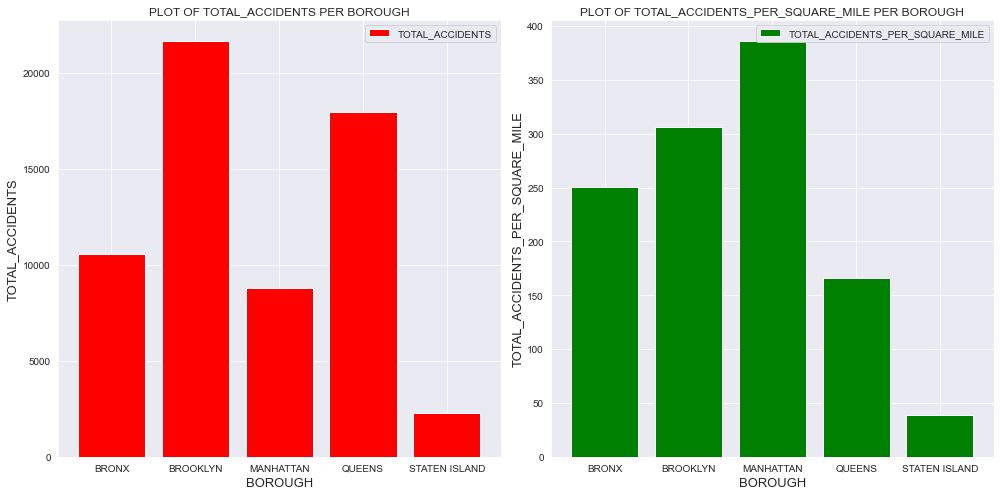

In [16]:
df['BOROUGH'] = df['BOROUGH'].str.lower()
df['BOROUGH'] = np.where(df['BOROUGH'].apply(lambda x: x == 'bronx'), 'the bronx', df['BOROUGH'] )
df['AREA'] = [data[i]['area'] for i in df['BOROUGH']]
df['POPULATION'] = [data[i]['population'] for i in df['BOROUGH']]
df['BOROUGH'] = np.where(df['BOROUGH'].apply(lambda x: x == 'the bronx'), 'bronx', df['BOROUGH'] )
df['BOROUGH'] = df['BOROUGH'].str.upper()
df.rename({'TOTAL':'TOTAL_ACCIDENTS'},axis = 1, inplace= True)
df2 =df[['BOROUGH','TOTAL_INJURED', 'TOTAL_DEATH','TOTAL_ACCIDENTS']].groupby('BOROUGH').sum()
dataset.index.name = 'BOROUGH'
dataset.rename(index ={'the bronx':'BRONX', 'brooklyn':'BROOKLYN', 'manhattan':'MANHATTAN', 'queens':'QUEENS', 'staten island':'STATEN ISLAND'}, inplace=True)
df3 = pd.concat([df2, dataset[['Area']]], axis = 1)
df3['TOTAL_ACCIDENTS_PER_SQUARE_MILE'] = df3['TOTAL_ACCIDENTS'] / df3['Area']
df3.reset_index(inplace = True)
fig, axes = plt.subplots(1,2,figsize = (14,7))
sns.set_style(style = 'darkgrid')
for data, subplot, color in zip(['TOTAL_ACCIDENTS', 'TOTAL_ACCIDENTS_PER_SQUARE_MILE'], axes, ['r','g']):
    subplot.bar(df3['BOROUGH'], df3[data], color = color,align = 'center', label = data)
    subplot.set_title(f'PLOT OF {data} PER BOROUGH')
    subplot.set_ylabel(data, fontsize = 13)
    subplot.set_xlabel('BOROUGH', fontsize = 13)
    subplot.legend()
plt.tight_layout()

**Illustration:**
<p>In the plot above, it was shown that <b>Brooklyn</b> has the highest total number of accidents per borough and <b>Manhattan</b> has the highest total number per square mile per borough</p>


<p>Which hours have the most accidents for each borough? Visualize thw plot on a bar graph for each borough showing the number of accidents for each hour of the day.</p>


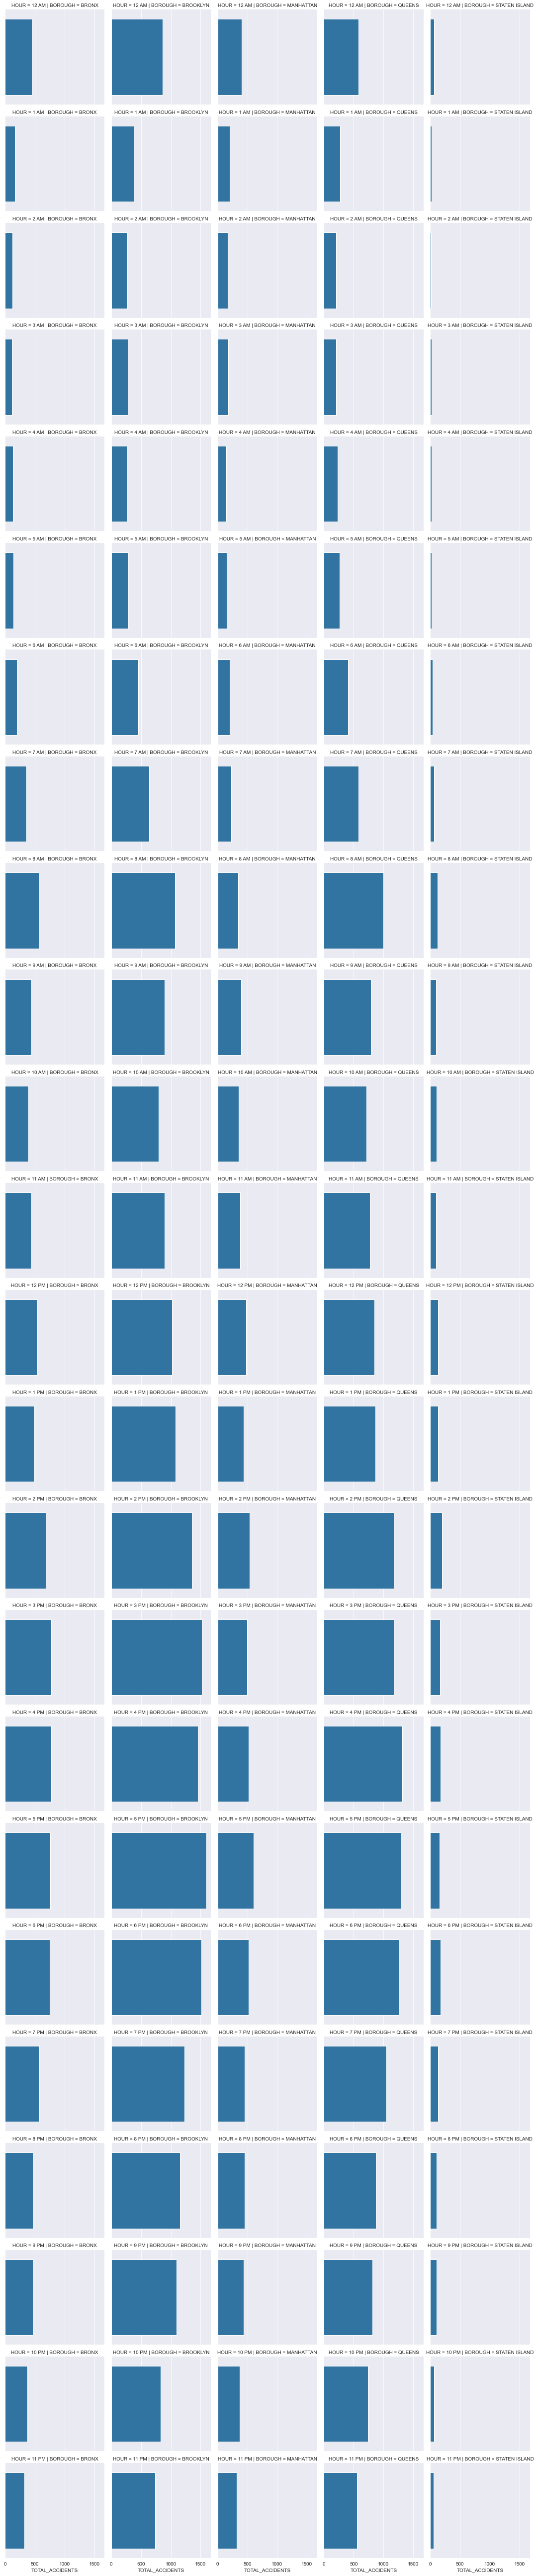

In [17]:
df4 = df[['HOUR', 'BOROUGH', 'TOTAL_ACCIDENTS']].groupby(['HOUR', 'BOROUGH']).sum()
df4.reset_index(inplace = True)
df4['HOUR'] = df4['HOUR'].apply(lambda x: time_format(x))
g = sns.FacetGrid(data = df4, col= 'BOROUGH', row= 'HOUR')
g.map(sns.barplot, 'TOTAL_ACCIDENTS')

In [18]:
idx_max= df4.groupby(['BOROUGH'])['TOTAL_ACCIDENTS'].transform(max) == df4['TOTAL_ACCIDENTS']
df4[idx_max].sort_values('TOTAL_ACCIDENTS', ascending =False)

,HOUR,BOROUGH,TOTAL_ACCIDENTS
86,5 PM,BROOKLYN,1593
83,4 PM,QUEENS,1316
75,3 PM,BRONX,779
87,5 PM,MANHATTAN,604
74,2 PM,STATEN ISLAND,196


<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<p>What factors cause the most accidents? </p>


In [19]:
doc =list(df.columns[df.columns.str.startswith('CONTRIBUTING')])
contributing_factor = pd.concat([df[i] for i in doc]).reset_index()
contributing_factor.rename({0:'CONTRIBUTING FACTORS', 'index': 'COUNT'},axis = 1, inplace = True)
contributing_factor.groupby('CONTRIBUTING FACTORS').count().sort_values(by = 'COUNT', ascending = False).head(5)

,COUNT
CONTRIBUTING FACTORS,
Unspecified,240164
Driver Inattention/Distraction,72203
Failure to Yield Right-of-Way,20413
Following Too Closely,17909
Backing Unsafely,15068


<p>Which vehicle types are most involved in accidents per borough? </p>

In [20]:
doc =list(df.columns[df.columns.str.startswith('VEHICLE')])
Vehicle_types = pd.concat([df[i] for i in doc]).reset_index()
Vehicle_types.rename({0:'VEHICLE TYPE', 'index': 'COUNT'},axis = 1, inplace = True)
Vehicle_types.groupby('VEHICLE TYPE').count().sort_values(by = 'COUNT', ascending = False).head(5)

,COUNT
VEHICLE TYPE,
Sedan,155882
Station Wagon/Sport Utility Vehicle,124663
PASSENGER VEHICLE,40623
SPORT UTILITY / STATION WAGON,31219
Taxi,16482


-------

<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[x] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

,2018_Quarter_Count,2019_Quarter_Count,Comparison
Contributing Factor,,,
Driver Inattention/Distraction,9674.0,10006.0,2019
Other Vehicular,1504.0,1628.0,2019
View Obstructed/Limited,359.0,371.0,2019
Fell Asleep,81.0,86.0,2019
Steering Failure,45.0,48.0,2019
Illnes,37.0,42.0,2019
Driverless/Runaway Vehicle,34.0,34.0,2019
Fatigued/Drowsy,31.0,38.0,2019
Lost Consciousness,22.0,36.0,2019


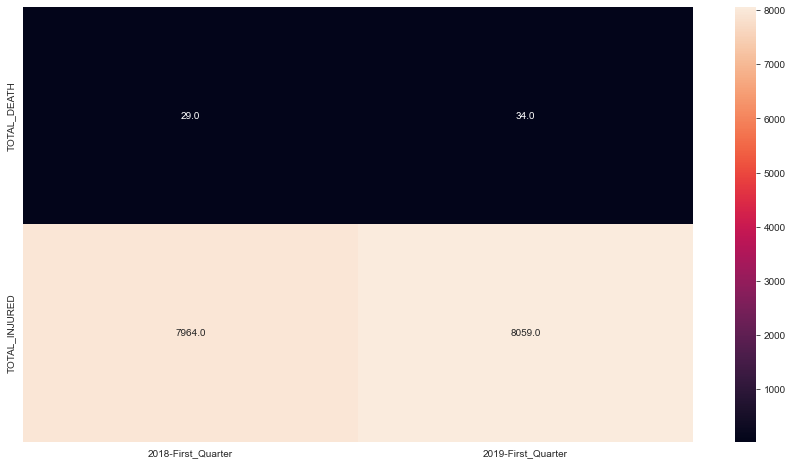

In [21]:
df['QUARTER_OF_THE_YEAR'] = df['DATETIME'].dt.quarter
df5 = df[df['QUARTER_OF_THE_YEAR'] == 1]
df5 = df5[[ 'TOTAL_DEATH', 'TOTAL_INJURED', 'DATETIME' ]].set_index('DATETIME').resample('Y').agg({'TOTAL_DEATH':'sum', 'TOTAL_INJURED':'sum'})
df5.reset_index(inplace = True)
df6 = df5.T.rename({0:'2018-First_Quarter', 1: '2019-First_Quarter'}, axis = 1)
df6.drop('DATETIME', axis= 0, inplace = True)
for i in df6.columns:
    df6[i] = df6[i].astype(str).astype(int)
plt.figure(figsize = (15,8))
sns.heatmap(df6, annot = True, fmt='.1f')
df_2018 = df[df['DATETIME'].dt.year == 2018]
df_2018_first_quarter = df_2018[df_2018['QUARTER_OF_THE_YEAR'] == 1]
df_2018_first_quarter.reset_index(drop = True)
df_2018_case = df_2018_first_quarter.iloc[:, [7,8,9,10,13,14,15,16,17]]
doc_2018 =list(df_2018_case.columns[df_2018_case.columns.str.startswith('CONTRIBUTING')])
contributing_factor_2018 = pd.concat([df_2018_case[i] for i in doc_2018]).reset_index()
df_2019 = df[df['DATETIME'].dt.year == 2019]
df_2019_first_quarter = df_2019[df_2019['QUARTER_OF_THE_YEAR'] == 1]
df_2019_first_quarter.reset_index(drop = True)
df_2019_case = df_2019_first_quarter.iloc[:, [7,8,9,10,13,14,15,16,17]]
doc_2019 =list(df_2019_case.columns[df_2019_case.columns.str.startswith('CONTRIBUTING')])
contributing_factor_2019 = pd.concat([df_2019_case[i] for i in doc_2019]).reset_index()
contributing_factor_2019.rename({0:'CONTRIBUTING FACTORS', 'index': 'COUNT'},axis = 1, inplace = True)
contributing_factor_2018.rename({0:'CONTRIBUTING FACTORS', 'index': 'COUNT'},axis = 1, inplace = True)
contributing_factor_2018.rename(columns={'COUNT': '2018_Quarter_Count'},  inplace = True)
contributing_factor_2019.rename(columns = {'COUNT': '2019_Quarter_Count'}, inplace = True)
contributing_factor_2018 = contributing_factor_2018.groupby('CONTRIBUTING FACTORS').count().sort_values(by = '2018_Quarter_Count', ascending = False)
contributing_factor_2019 = contributing_factor_2019.groupby('CONTRIBUTING FACTORS').count().sort_values(by = '2019_Quarter_Count', ascending = False)
freq_of_causes_of_accidents = pd.concat([contributing_factor_2018, contributing_factor_2019], axis = 1, sort = False)
freq_of_causes_of_accidents.index.name = 'Contributing Factor'
freq_of_causes_of_accidents['Comparison'] = np.where((freq_of_causes_of_accidents['2018_Quarter_Count'] >freq_of_causes_of_accidents['2019_Quarter_Count']), '2018', '2019')
freq_of_causes_of_accidents[freq_of_causes_of_accidents['Comparison'] =='2019'].head(10)

**Recommendation**
<p>It was shown above from the dataframe that after comparing the contributing factors between the first quarter of 2018 and 2019.
It was observed that the above factors is higher in the first quarter of 2019 than 2018. 
Thus, it will be of the highest priority for the Traffic agency to ensure that targeted education 
and awareness initiatives should be done to ensure decrease in the factor which invariably decrease the number of accidents.</p>

<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>

**Answer.**

,TOTAL_DEATH,Cummulative Diffrence
Vehicle,,
Station Wagon/Sport Utility Vehicle,100,21.0
Sedan,79,46.0
PASSENGER VEHICLE,33,7.0
SPORT UTILITY / STATION WAGON,26,4.0
Motorcycle,22,3.0
Bike,19,9.0
Bus,10,2.0
Pick-up Truck,8,0.0
Box Truck,8,3.0


<Figure size 432x288 with 0 Axes>

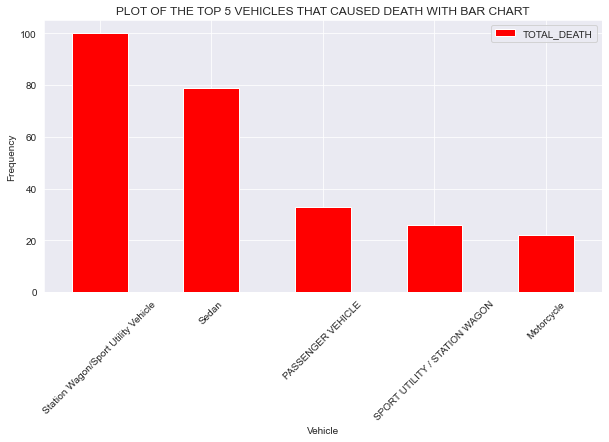

In [22]:
plt.figure()
df8 = df.iloc[:, [19, 20, 21,22,23,26]]
df8.index.name = 'index'
doc_vehicle = list(df8.columns[df8.columns.str.startswith('VEHICLE')])
vehicle = pd.concat([df8[i] for i in doc_vehicle]).reset_index()
df9 = df8[['TOTAL_DEATH']]
df9.reset_index(inplace =True)
df10 = vehicle.set_index('index').join(df9.set_index('index'))
df10.reset_index(inplace = True)
df10.rename(columns={0:'Vehicle'}, inplace = True)
ax = df10[['Vehicle', 'TOTAL_DEATH']].groupby('Vehicle').sum().sort_values(by= 'TOTAL_DEATH',ascending= False).head(5).plot.bar(figsize = (10,5),color = 'r', rot = 45)
ax.set_title('PLOT OF THE TOP 5 VEHICLES THAT CAUSED DEATH WITH BAR CHART')
ax.set_ylabel('Frequency')
df11 = df10[['Vehicle', 'TOTAL_DEATH']].groupby('Vehicle').sum().sort_values(by= 'TOTAL_DEATH',ascending= False)
df12 = df10[['Vehicle', 'TOTAL_DEATH']].groupby('Vehicle').sum().sort_values(by= 'TOTAL_DEATH',ascending=True).diff()[::-1].rename({'TOTAL_DEATH': 'Cummulative Diffrence'}, axis =1)
df11.join(df12).head(10)
